In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [61]:
x_data = [[73., 80., 75.],
         [93., 88., 93.],
         [89., 91., 90.],
         [96., 98., 100.],
         [73., 66., 70.]] # 5 * 3 matrix

In [62]:
y_data = [152., 185., 180., 196., 142.]

In [63]:
X = tf.placeholder(tf.float32, [None, 3], name="X")

In [64]:
Y = tf.placeholder(tf.float32, name="Y")

In [65]:
W = tf.Variable([[2.],[2.],[2.]], tf.float32, name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [66]:
hypothesis = tf.add(tf.matmul(X, W), b)
print(hypothesis)

Tensor("Add_3:0", shape=(?, 1), dtype=float32)


In [67]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

Tensor("Mean_3:0", shape=(), dtype=float32)


In [71]:
train = tf.train.GradientDescentOptimizer(3e-5).minimize(cost)

In [72]:
step_history = []
cost_history = []

0 Cost :  118869.0 
Prediction : 
 [[ 455.35934448]
 [ 547.359375  ]
 [ 539.359375  ]
 [ 587.359375  ]
 [ 417.35934448]] 

100 Cost :  856.294 
Prediction : 
 [[ 150.35429382]
 [ 181.16638184]
 [ 178.3560791 ]
 [ 193.98324585]
 [ 138.35760498]] 

200 Cost :  850.42 
Prediction : 
 [[ 150.18028259]
 [ 181.31208801]
 [ 178.33607483]
 [ 193.7081604 ]
 [ 138.76924133]] 

300 Cost :  844.771 
Prediction : 
 [[ 150.02830505]
 [ 181.44242859]
 [ 178.3225708 ]
 [ 193.43966675]
 [ 139.15913391]] 

400 Cost :  839.322 
Prediction : 
 [[ 149.89665222]
 [ 181.55871582]
 [ 178.31504822]
 [ 193.1774292 ]
 [ 139.5289917 ]] 

500 Cost :  834.053 
Prediction : 
 [[ 149.78361511]
 [ 181.66200256]
 [ 178.31298828]
 [ 192.92098999]
 [ 139.88021851]] 

600 Cost :  828.945 
Prediction : 
 [[ 149.68771362]
 [ 181.75338745]
 [ 178.31594849]
 [ 192.66999817]
 [ 140.21426392]] 

700 Cost :  823.983 
Prediction : 
 [[ 149.60751343]
 [ 181.83380127]
 [ 178.32348633]
 [ 192.42419434]
 [ 140.53234863]] 

800 Cost :

6900 Cost :  638.677 
Prediction : 
 [[ 153.05148315]
 [ 180.73797607]
 [ 180.97036743]
 [ 181.85296631]
 [ 149.66433716]] 

7000 Cost :  636.874 
Prediction : 
 [[ 153.1232605 ]
 [ 180.7048645 ]
 [ 181.01257324]
 [ 181.72473145]
 [ 149.75527954]] 

7100 Cost :  635.097 
Prediction : 
 [[ 153.19465637]
 [ 180.67182922]
 [ 181.05439758]
 [ 181.59745789]
 [ 149.84547424]] 

7200 Cost :  633.346 
Prediction : 
 [[ 153.26557922]
 [ 180.63905334]
 [ 181.09599304]
 [ 181.47120667]
 [ 149.93501282]] 

7300 Cost :  631.62 
Prediction : 
 [[ 153.33610535]
 [ 180.60655212]
 [ 181.1374054 ]
 [ 181.34587097]
 [ 150.02384949]] 

7400 Cost :  629.919 
Prediction : 
 [[ 153.40612793]
 [ 180.57409668]
 [ 181.17840576]
 [ 181.22137451]
 [ 150.11190796]] 

7500 Cost :  628.243 
Prediction : 
 [[ 153.47572327]
 [ 180.54185486]
 [ 181.21916199]
 [ 181.09785461]
 [ 150.19929504]] 

7600 Cost :  626.59 
Prediction : 
 [[ 153.5448761 ]
 [ 180.50990295]
 [ 181.2596283 ]
 [ 180.97523499]
 [ 150.28605652]] 

77

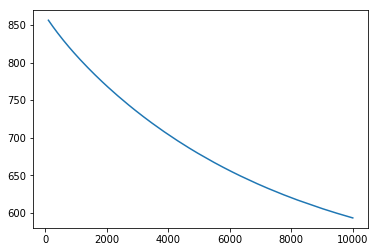

In [73]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    
    for step in range(10001):
        cost_val, h_val, _ = sess.run([cost, hypothesis, train], feed_dict=feed)
        if step > 100:
            step_history.append(step)
            cost_history.append(cost_val)
        if step % 100 == 0:
            print(step, "Cost : ", cost_val, "\nPrediction : \n", h_val, "\n")
    plt.plot(step_history, cost_history)
    plt.show()
    sess.close()